# AIPI 590 - XAI | Assignment #3

## Description

In this assignment, you will work with a dataset from a telecommunications company (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code). The company is interested in understanding the factors that contribute to customer churn (customers leaving the company for a competitor) and developing interpretable models to predict which customers are at risk of churning.

## Suneel Nadipalli

## Importing Libraries

In [ ]:
!pip install pygam --quiet

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import *

from pygam import LogisticGAM, s

## Reading Data

In [ ]:
# Reading in data

df = pd.read_csv("/content/churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Basic Information about Dataset

In [ ]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking if there are any null values

df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Printing the mean, standard deviation, minimum and maximum values for the numerical columns

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
# Dropping the Customer ID column

df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

### Mapping Binary Text Columns to Numerical Columns

In [ ]:
# Identify columns with only 2 unique values and print their mappings
for column in df.columns:
    unique_values = df[column].unique()

    # Check if there are exactly 2 unique values
    if len(unique_values) == 2:
        # Create a mapping dictionary to map the first unique value to 0 and the second to 1
        mapping_dict = {unique_values[0]: 0, unique_values[1]: 1}

        # Print the mapping for this column
        print(f"Column: {column}")
        print(f"Mapping: {mapping_dict}")
        print("-" * 30)

        # Apply the mapping to the column
        df[column] = df[column].map(mapping_dict)


Column: gender
Mapping: {'Female': 0, 'Male': 1}
------------------------------
Column: SeniorCitizen
Mapping: {0: 0, 1: 1}
------------------------------
Column: Partner
Mapping: {'Yes': 0, 'No': 1}
------------------------------
Column: Dependents
Mapping: {'No': 0, 'Yes': 1}
------------------------------
Column: PhoneService
Mapping: {'No': 0, 'Yes': 1}
------------------------------
Column: PaperlessBilling
Mapping: {'Yes': 0, 'No': 1}
------------------------------
Column: Churn
Mapping: {'No': 0, 'Yes': 1}
------------------------------


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,0,Electronic check,29.85,29.85,0
1,1,0,1,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,1,Mailed check,56.95,1889.5,0
2,1,0,1,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,0,Mailed check,53.85,108.15,1
3,1,0,1,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,1,Bank transfer (automatic),42.30,1840.75,0
4,0,0,1,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,0,Electronic check,70.70,151.65,1


### Plotting Numerical Columns Against Churn

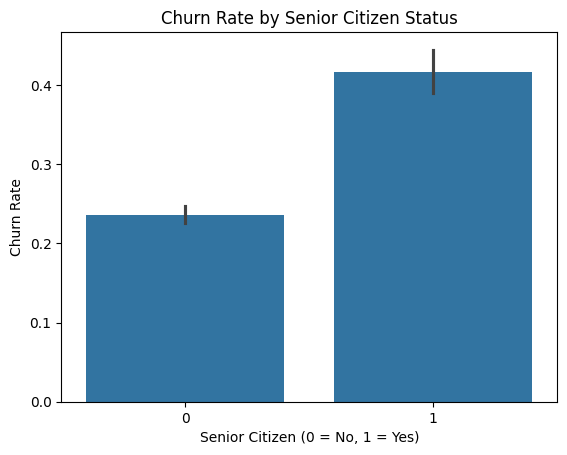

In [ ]:
# Bar plot to show churn rate for Senior Citizens
sns.barplot(x='SeniorCitizen', y='Churn', data=df)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()


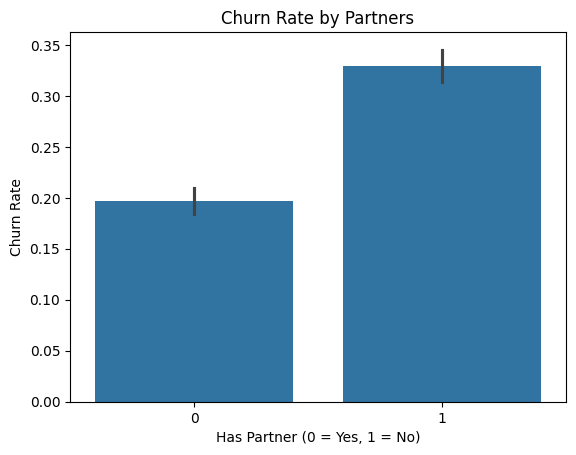

In [ ]:
# Bar plot to show churn rate for people with/without Partners
sns.barplot(x='Partner', y='Churn', data=df)
plt.title('Churn Rate by Partners')
plt.xlabel('Has Partner (0 = Yes, 1 = No)')
plt.ylabel('Churn Rate')
plt.show()


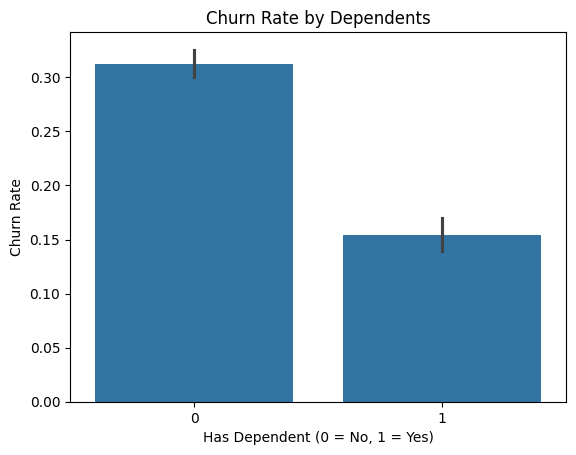

In [ ]:
# Bar plot to show churn rate for people with/without Dependents
sns.barplot(x='Dependents', y='Churn', data=df)
plt.title('Churn Rate by Dependents')
plt.xlabel('Has Dependent (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()

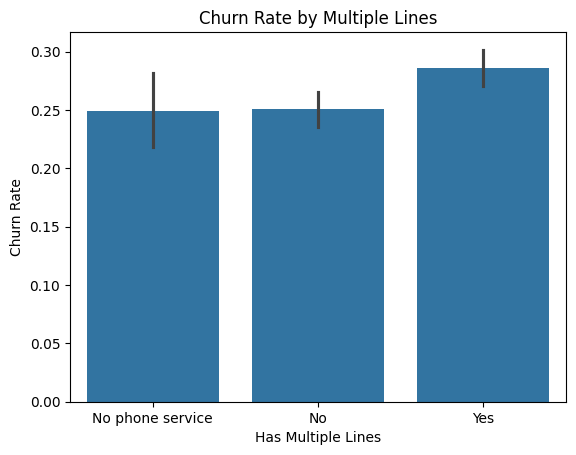

In [ ]:
# Bar plot to show churn rate for people with/without Phone Lines
sns.barplot(x='MultipleLines', y='Churn', data=df)
plt.title('Churn Rate by Multiple Lines')
plt.xlabel('Has Multiple Lines')
plt.ylabel('Churn Rate')
plt.show()

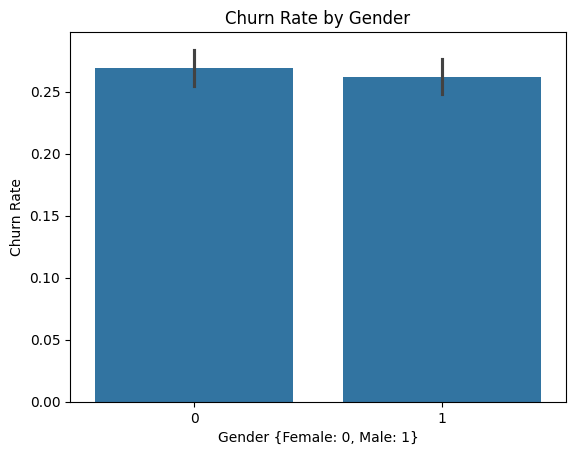

In [ ]:
# Bar plot to show churn rate by Genders
sns.barplot(x='gender', y='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender {Female: 0, Male: 1}')
plt.ylabel('Churn Rate')
plt.show()

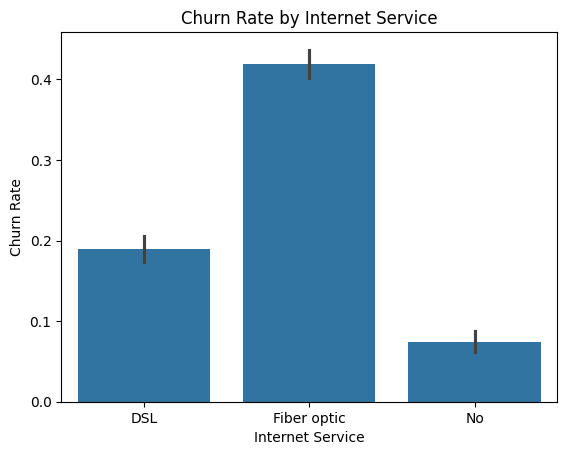

In [ ]:
# Bar plot to show churn rate for different kinds of Internet Service
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.show()

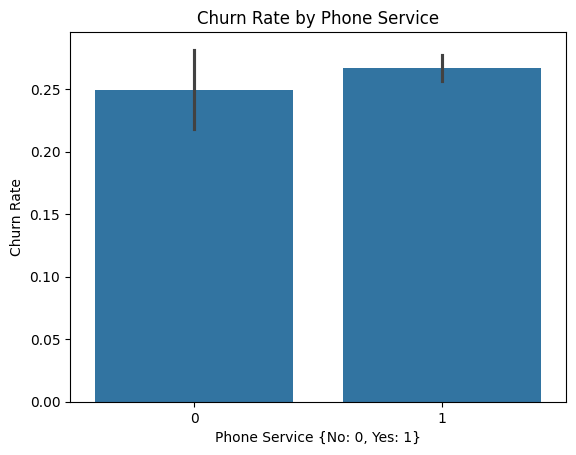

In [ ]:
# Bar plot to show churn rate based on Phone Service
sns.barplot(x='PhoneService', y='Churn', data=df)
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service {No: 0, Yes: 1}')
plt.ylabel('Churn Rate')
plt.show()

Insights:

- Customers who are Senior Citizens are more likely to churn
- Customers without Partners are more likely to churn
- Customers without Dependents are more likely to churn
- Neither having multiple phone lines nor gender have much of an effect on churn
- Customers having Fiber Optic connections are much more likely to churn
- Phone Service has a negligble effect on churn

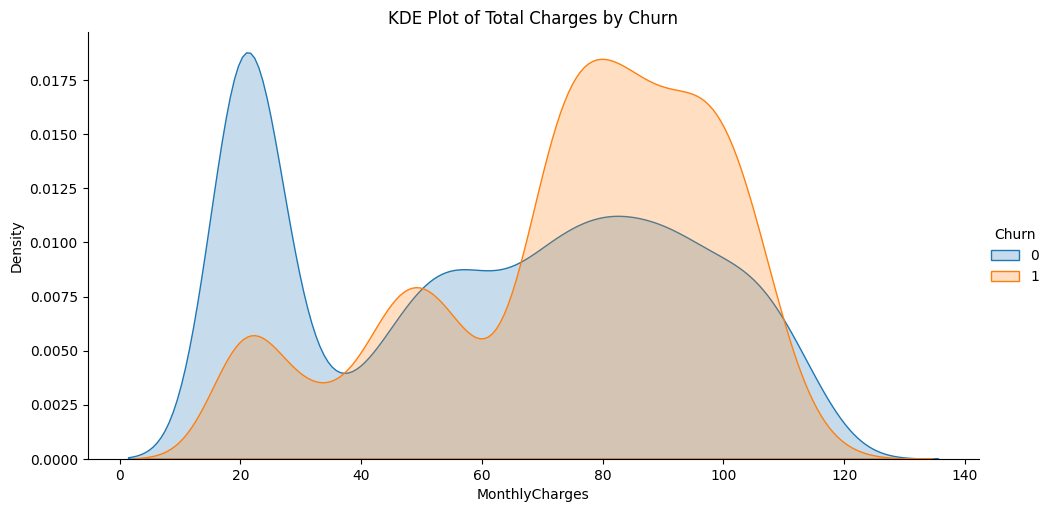

In [ ]:
# FacetGrid for 'TotalCharges' with KDE plots by Churn
g = sns.FacetGrid(df, hue="Churn", height=5, aspect=2)
g.map(sns.kdeplot, "MonthlyCharges", fill=True)
g.add_legend()
plt.title('KDE Plot of Total Charges by Churn')
plt.show()

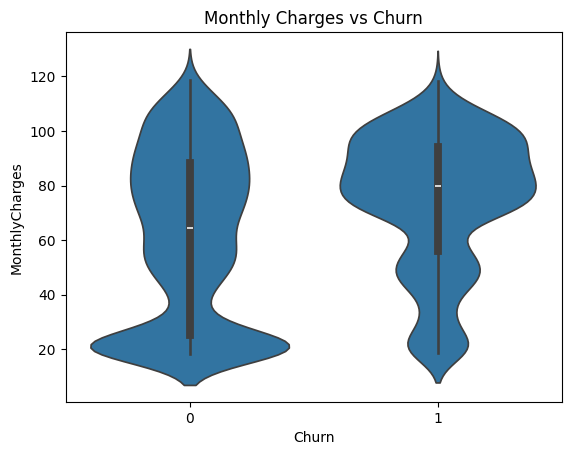

In [ ]:
# Violin plot for 'MonthlyCharges' against Churn
sns.violinplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()


People with lower monthly charges (around $20-$40) are much less likely to chrun than people with higher monthly charges (around $70-$80)


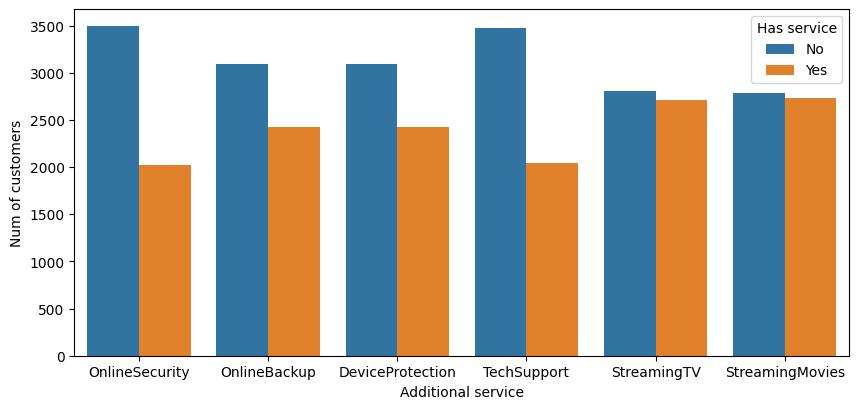

In [ ]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

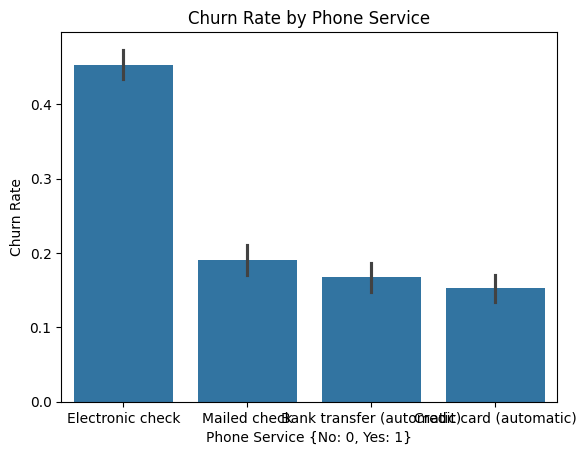

In [ ]:
sns.barplot(x='PaymentMethod', y='Churn', data=df)
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service {No: 0, Yes: 1}')
plt.ylabel('Churn Rate')
plt.show()

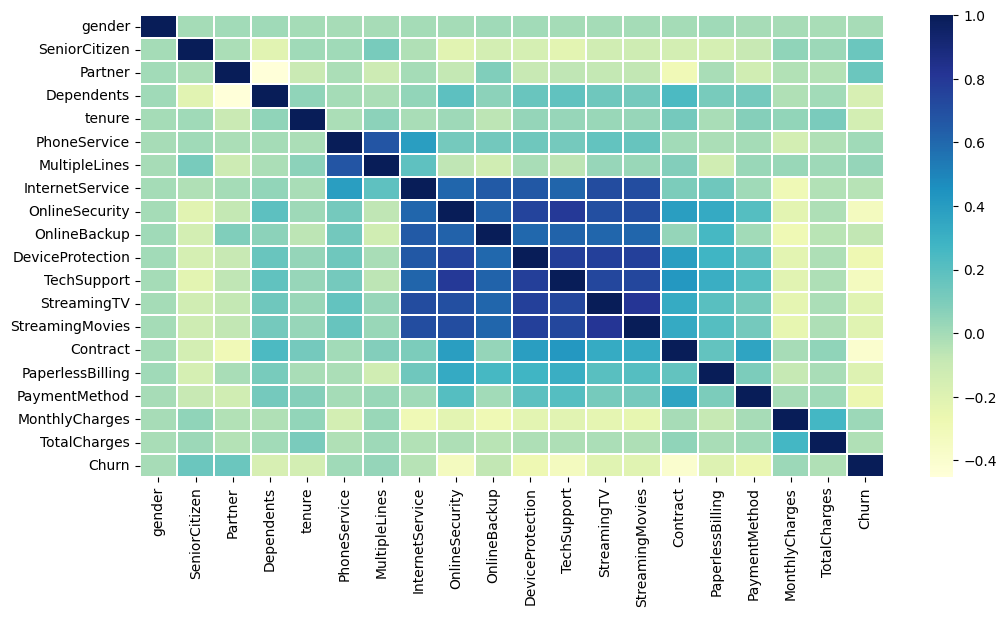

In [ ]:
plt.figure(figsize=(12, 6))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

### Encoding Text Columns for modelling

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [ ]:
# Select columns that are of object type (categorical/text columns)
text_columns = df.select_dtypes(include=['object']).columns
print("Text columns:", text_columns)


Text columns: Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')


In [ ]:
# One-hot encode the remaining text columns

df_encoded = pd.get_dummies(df, columns=text_columns, drop_first=True)

# Display the first few rows of the transformed dataframe
(df_encoded.head())


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.850000,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,0,34,1,1,56.95,1889.500000,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,1,0,2,1,0,53.85,108.150002,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,1,0,45,0,1,42.30,1840.750000,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,1,0,2,1,0,70.70,151.649994,1,...,False,False,False,False,False,False,False,False,True,False


### Checking Assumptions for different ML Models

#### Linearity

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


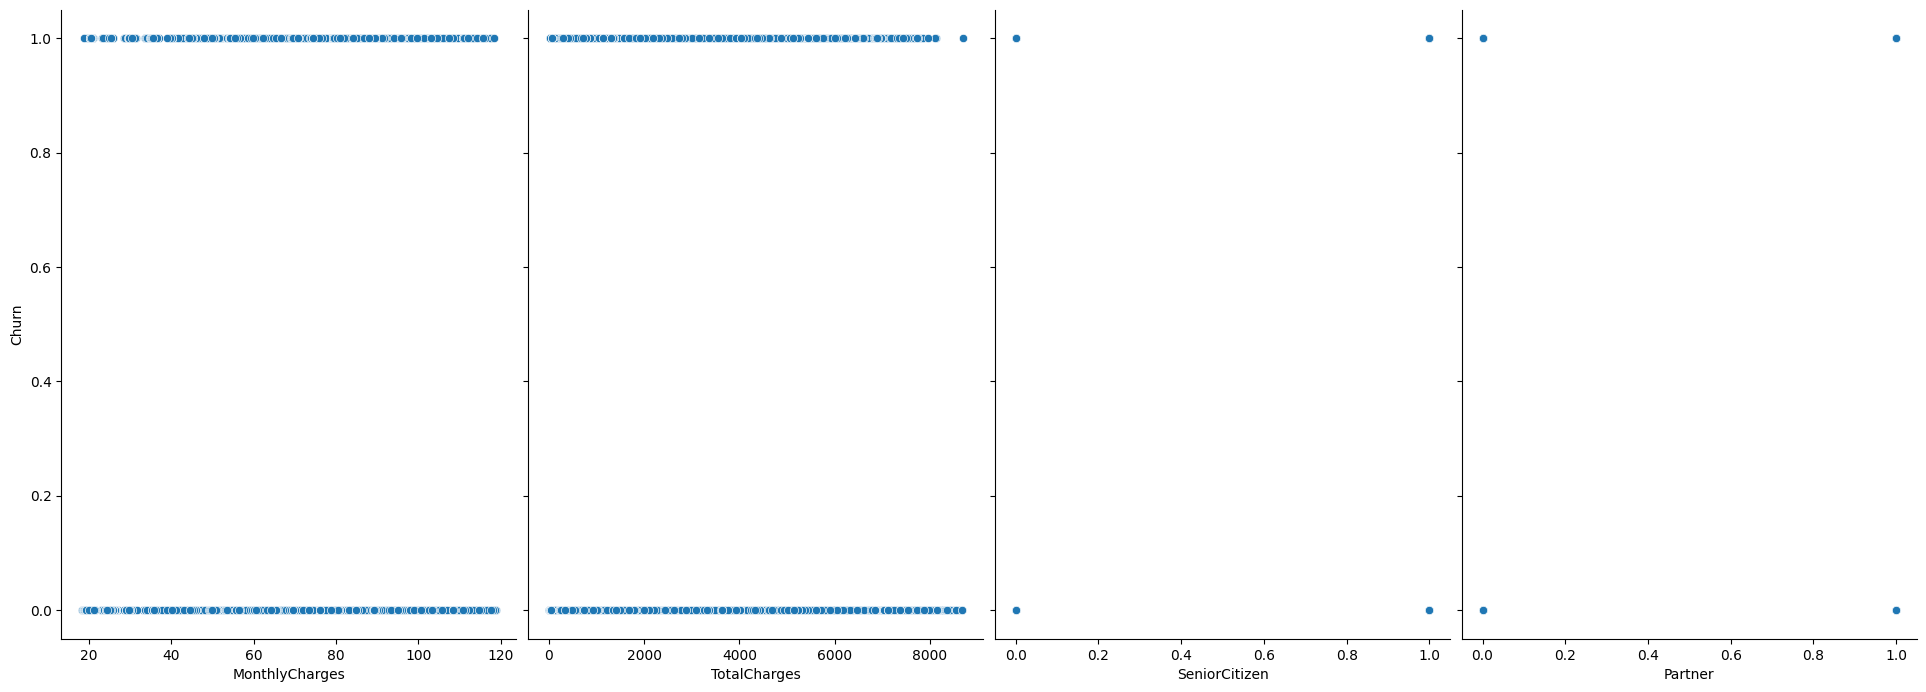

In [ ]:
p = sns.pairplot(df, x_vars=['MonthlyCharges','TotalCharges', 'SeniorCitizen', 'Partner'], y_vars='Churn', size=7, aspect=0.7)

### Mean of Residuals

In [ ]:
x = df_encoded.drop(["Churn"],axis=1)
y = df_encoded.Churn

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [ ]:


regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [ ]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))


R squared: 0.29565399373384404


In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 3.351969187517179e-05


#### Homoscedasticity

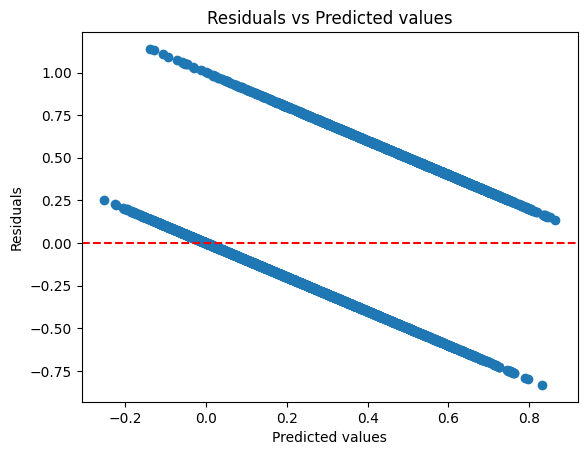

In [ ]:
# Plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()


#### Normality of error terms/residuals

<ipython-input-34-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


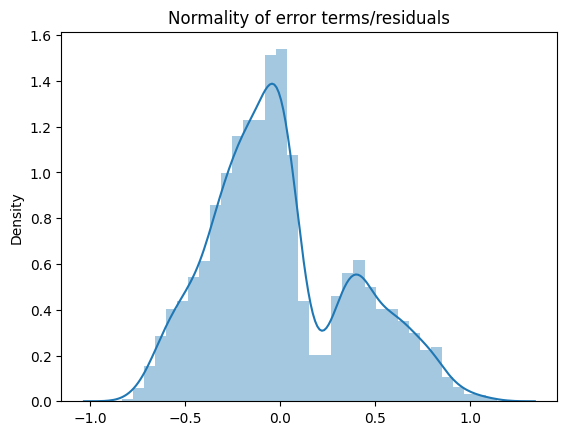

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The data is ***not*** linear and is not fit for linear modeling

### Modeling for Linear Regression

In [ ]:
x = df_encoded.drop(["Churn"],axis=1)
y = df_encoded.Churn

# Scaling data

sc = StandardScaler()
X = sc.fit_transform(x)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [ ]:
# Fitting data on the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = linear_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print metrics
print("Model Performance Metrics:")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Model Performance Metrics:
R-squared: 0.24487987707283432
Mean Absolute Error (MAE): 0.30154169930692337
Mean Squared Error (MSE): 0.14633661851828111
Root Mean Squared Error (RMSE): 0.3825396953497521


In [ ]:
print("\nModel Coefficients:")
print(f"Intercept: {linear_model.intercept_}")
print(f"Coefficients: {linear_model.coef_}")


Model Coefficients:
Intercept: 0.26571539180457376
Coefficients: [-5.44350298e-03  2.00707318e-02 -4.16111786e-04 -1.10558123e-02
 -4.84301113e-02  1.59971615e+11 -2.02836140e-02  7.94450901e-02
 -1.03210396e-01  1.59971615e+11  2.59494594e-02  5.50033764e-02
 -1.41538646e+11 -1.36631331e+11 -2.59923862e-02  8.71764278e+11
 -2.20441202e-02 -1.87564955e+11 -5.14205775e-03 -1.43863453e+11
 -2.43413328e-02 -1.12645199e+11  1.66232959e-02 -1.49520694e+11
  7.46777865e-03 -4.79615650e-02 -3.32870371e-02 -5.38275381e-03
  3.31887633e-02 -2.37835996e-03]


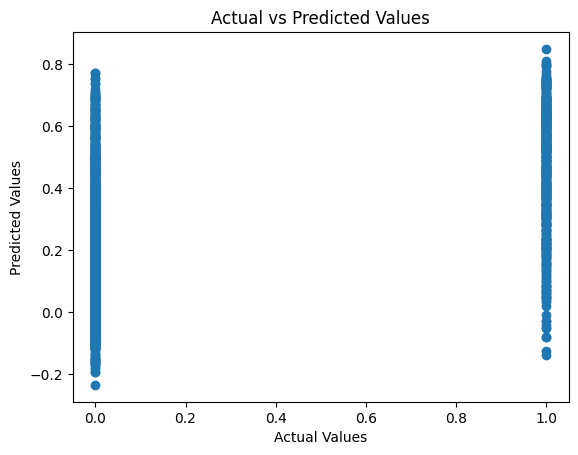

In [ ]:
# Scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


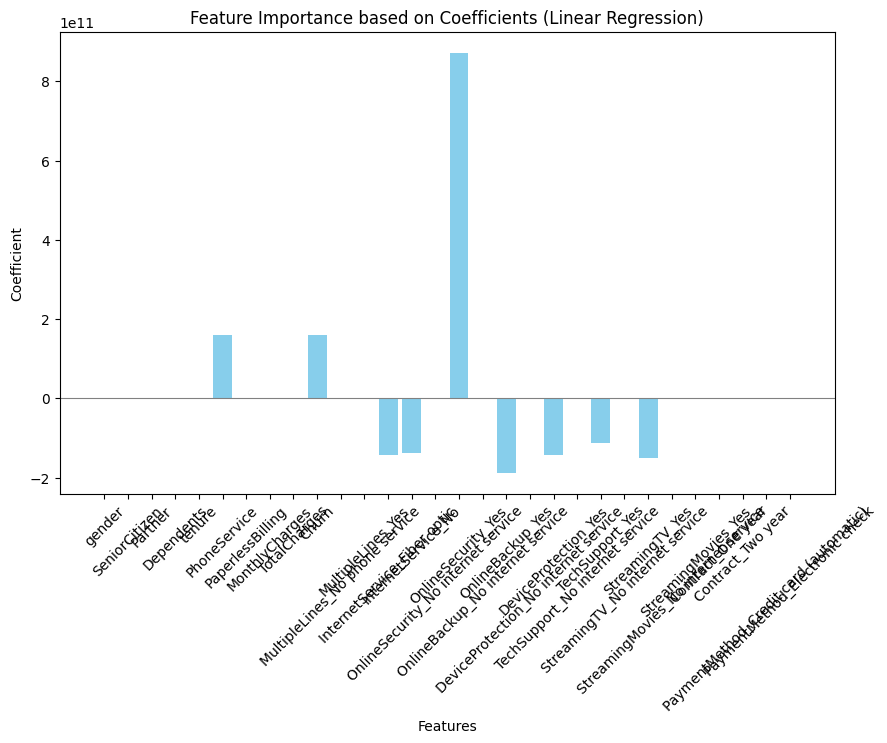

In [ ]:


# Get feature names and coefficients
features = df_encoded.columns  # Independent variable names
coefficients = linear_model.coef_  # Coefficients from the trained linear model

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
})

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance based on Coefficients (Linear Regression)')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8)  # Line at y=0 for reference
plt.show()

### Modeling for Logistic Regression

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the basic metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Performance Metrics:
Accuracy: 0.80
Precision: 0.64
Recall: 0.54
F1 Score: 0.58
ROC-AUC Score: 0.83



Confusion Matrix:
[[1159  139]
 [ 215  248]]


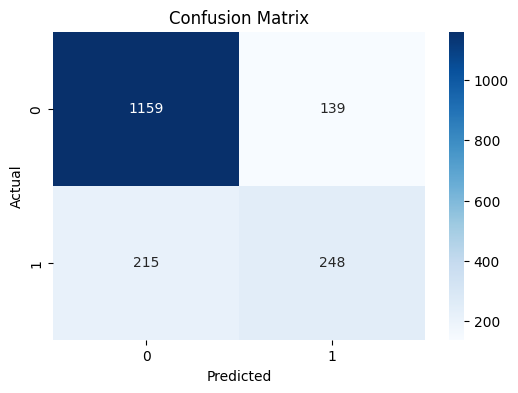


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1298
           1       0.64      0.54      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

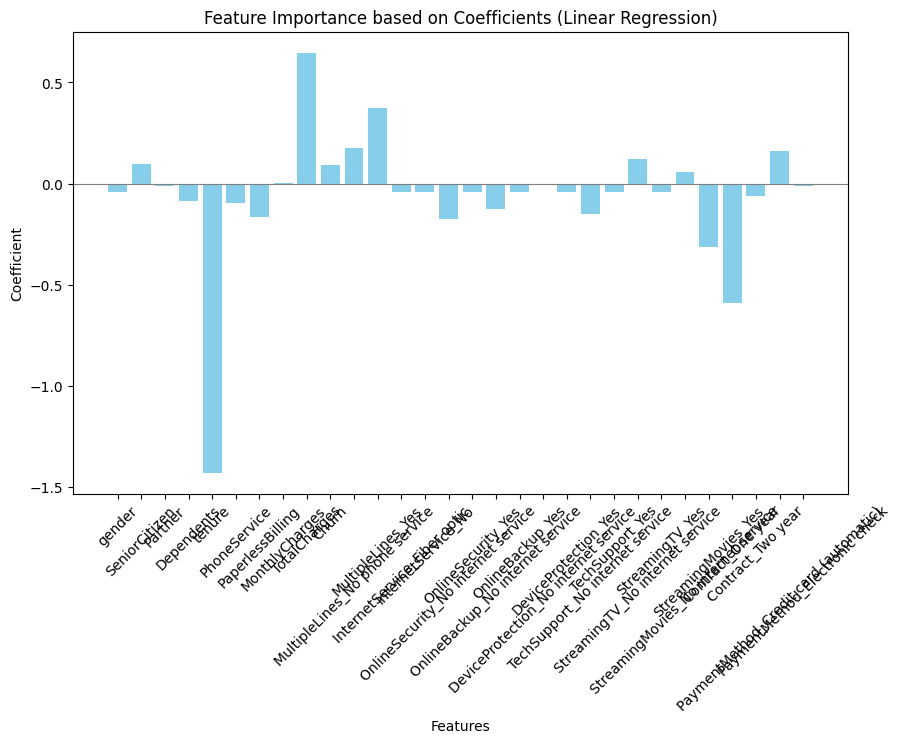

In [ ]:

# Get feature names and coefficients
features = df_encoded.columns  # Independent variable names
coefficients = logistic_model.coef_[0]  # Coefficients from the trained linear model

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
})

plt.figure(figsize=(10, 6))
plt.bar(features, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance based on Coefficients (Linear Regression)')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linewidth=0.8)  # Line at y=0 for reference
plt.show()

In [ ]:
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18)  + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + s(29)).fit(X_train, y_train)  # Adjust 's()' to the number of features

# Predict on the test set
y_pred = gam.predict(X_test)
y_prob = gam.predict_proba(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Performance Metrics:
Accuracy: 0.80
Precision: 0.64
Recall: 0.53
F1 Score: 0.58
ROC-AUC Score: 0.83


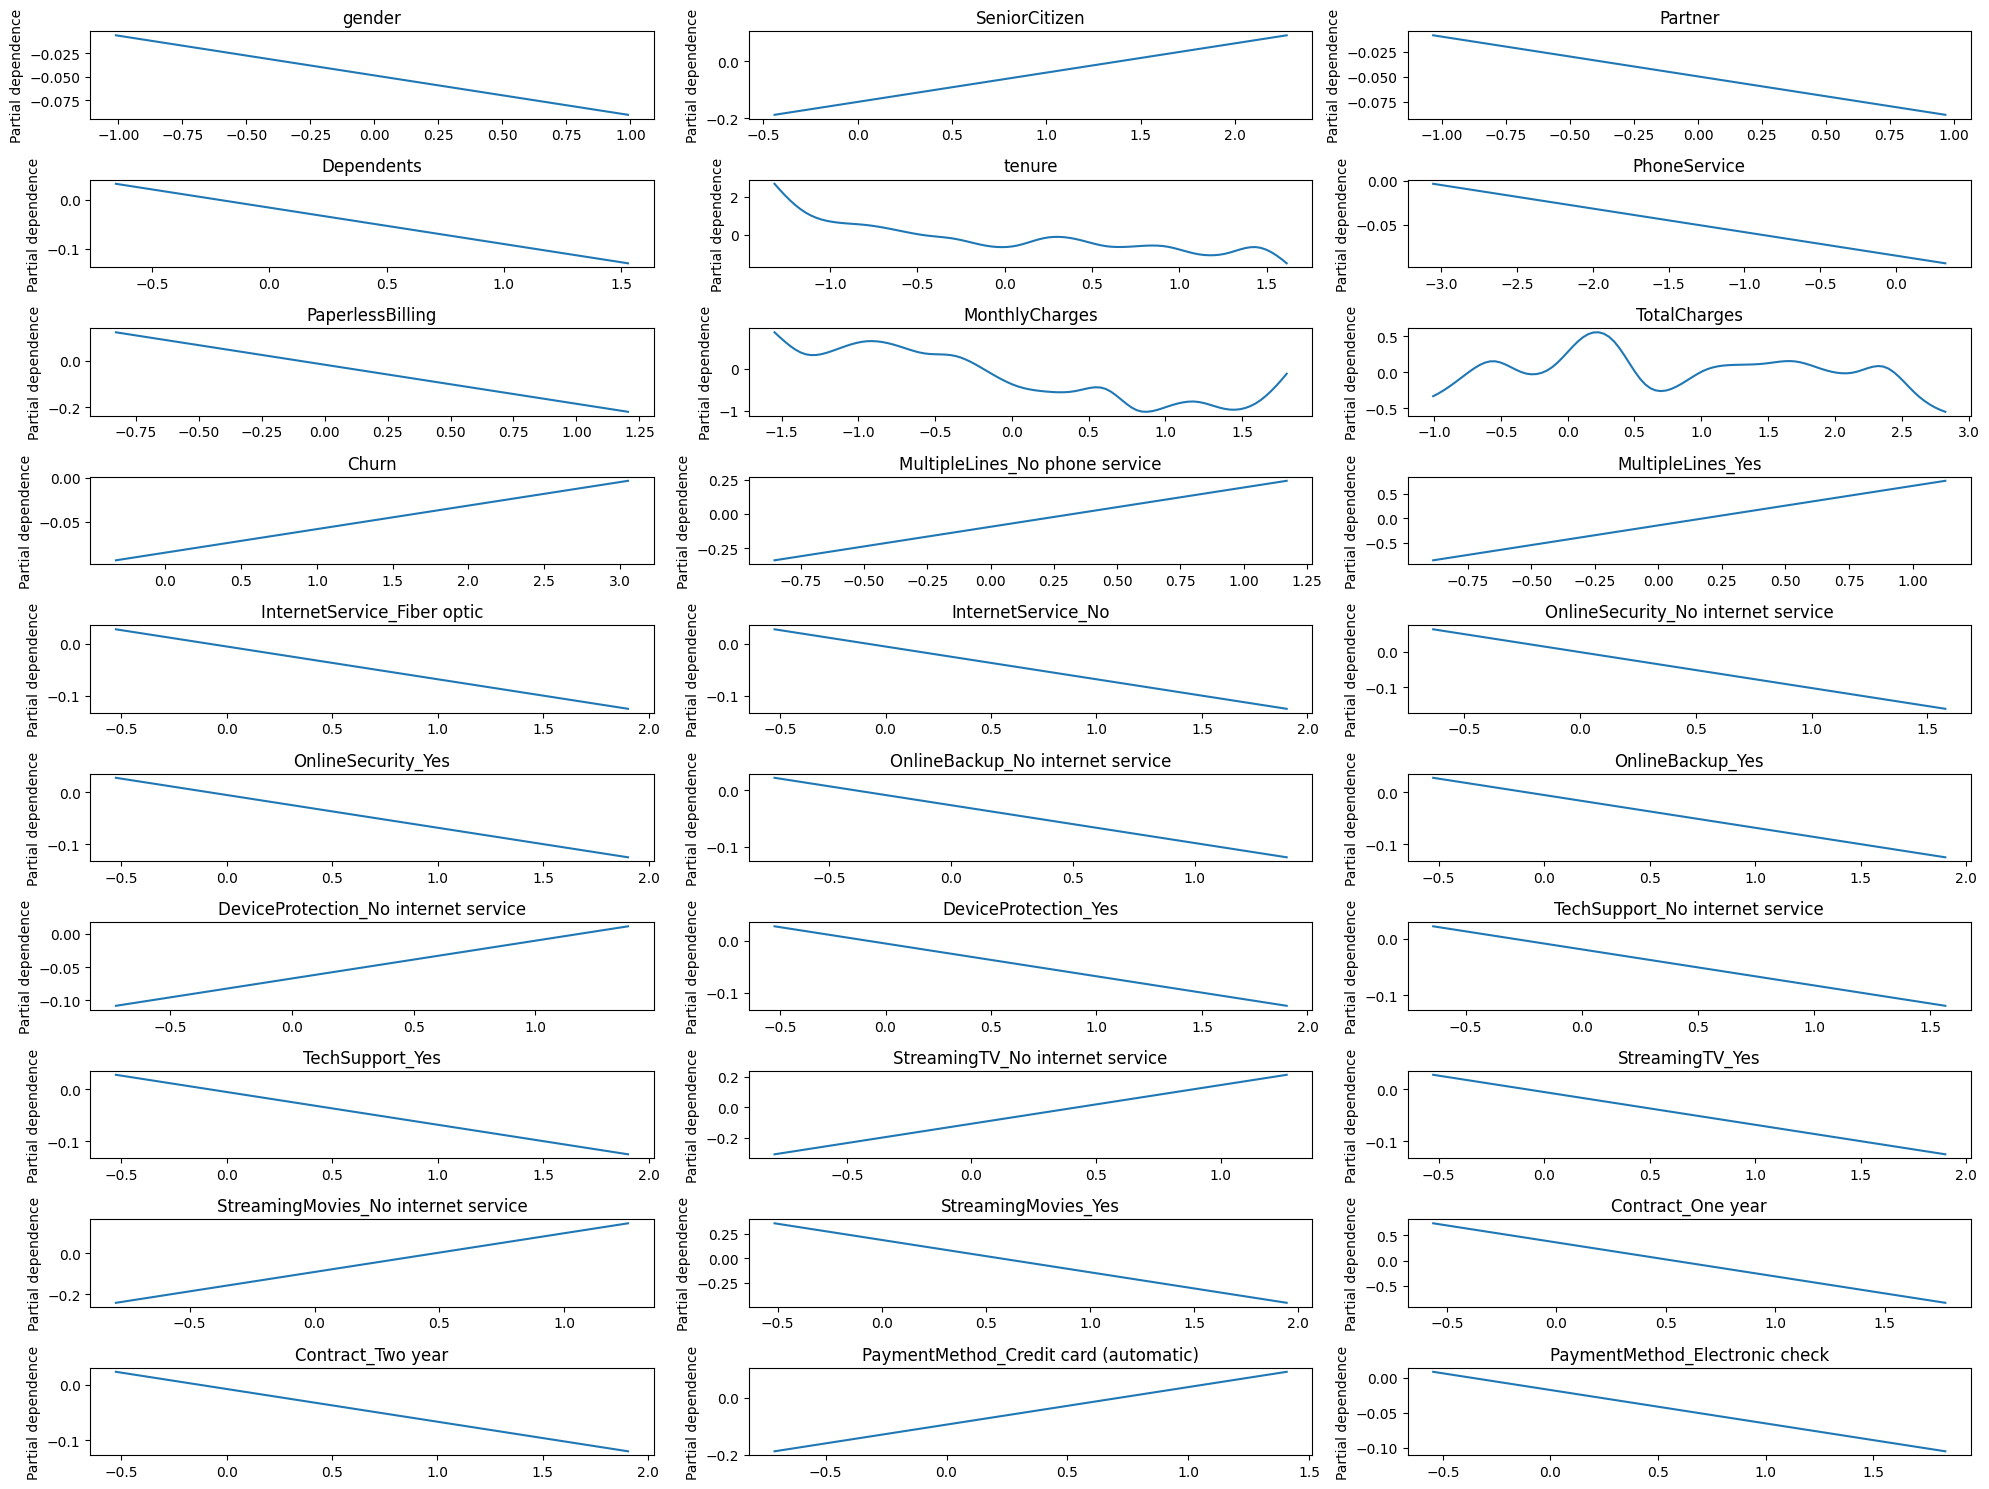

In [ ]:
plt.figure(figsize=(20, 15))
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.subplot(10, 3, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, term.feature], gam.partial_dependence(term=i, X=XX))
    plt.title(df_encoded.columns[i])
    plt.ylabel('Partial dependence')
plt.tight_layout()
plt.show()

I would recommend the GAM model to the company.

It can be seen from the assumptions that this dataset is not linear and hence, would not be fit for linear models.

Furthermore, given that both Logistic Regression and Logistic GAM have similar performances, GAM provides more information as to how the features are effecting the final target variable, hence making it more interpretable